In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

root_folder = exp_path = Path().absolute() / "experiments" 

# Get latest generated folder
subfolder_list = [f for f in root_folder.iterdir()]
subfolder_list_creation_time = [f.stat().st_ctime for f in subfolder_list]
latest_subfolder_idx =  subfolder_list_creation_time.index(max(subfolder_list_creation_time))
experiment_path = subfolder_list[latest_subfolder_idx]

# Read CSV results
df = pd.read_csv(experiment_path / "results.csv")


In [114]:
# Config file
with open(experiment_path / "config.yml") as f:
     print(f.read())

experiment_name: seqseq
n_repeats: 10
scenario_params_list:
 - partners_count: 
     - 4
   amounts_per_partner: 
     - [0.3, 0.3, 0.2, 0.2]
   samples_split_option: 
     - 'stratified'
   multi_partner_learning_approach:
     - 'fedavg'
     - 'seq-pure'
     - 'seq-with-final-agg'
     - 'seqavg'
   aggregation_weighting: 
     - 'uniform' 
   epoch_count: 
     - 50
   minibatch_count: 
     - 1
     - 2
     - 5
     - 10


In [115]:
experiment_path

PosixPath('/data/projects/distributed-learning-contributivity/experiments/seqseq_2020-06-04_18h33')

In [116]:
scenario_ids = df.scenario_id.unique()
random_states = df.random_state.unique()
samples_split_options = df.samples_split_option.unique()
amounts_per_partner_list = df.amounts_per_partner.unique()

print('Random state', random_states)
print('Scenario id', scenario_ids)
print('amounts_per_partner', amounts_per_partner)
print()

df.info()
df.head(2)

Random state [0 1 2 3 4 5 6 7 8 9]
Scenario id [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
amounts_per_partner [0.2, 0.2, 0.2, 0.2, 0.2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 22 columns):
aggregation_weighting              160 non-null object
amounts_per_partner                160 non-null object
dataset_name                       160 non-null object
epoch_count                        160 non-null float64
final_relative_nb_samples          160 non-null object
gradient_updates_per_pass_count    160 non-null float64
is_early_stopping                  160 non-null float64
learning_computation_time_sec      160 non-null float64
minibatch_count                    160 non-null float64
mpl_nb_epochs_done                 160 non-null float64
mpl_test_score                     160 non-null float64
multi_partner_learning_approach    160 non-null object
nb_samples_used                    160 non-null float64
partners_count              

,aggregation_weighting,amounts_per_partner,dataset_name,epoch_count,final_relative_nb_samples,gradient_updates_per_pass_count,is_early_stopping,learning_computation_time_sec,minibatch_count,mpl_nb_epochs_done,...,nb_samples_used,partners_count,samples_split_option,scenario_name,short_scenario_name,single_partner_test_mode,test_data_samples_count,train_data_samples_count,random_state,scenario_id
0,uniform,"[0.3, 0.3, 0.2, 0.2]",MNIST,50.0,"[0.3, 0.3, 0.2, 0.2]",8.0,1.0,42.208436,1.0,7.0,...,48000.0,4.0,stratified,scenario_1_repeat_1_2020-06-04_18h33_ad2,"4 [0.3, 0.3, 0.2, 0.2]",global,10000.0,48000.0,0,0
1,uniform,"[0.3, 0.3, 0.2, 0.2]",MNIST,50.0,"[0.3, 0.3, 0.2, 0.2]",8.0,1.0,192.560931,2.0,19.0,...,48000.0,4.0,stratified,scenario_2_repeat_1_2020-06-04_18h34_3e4,"4 [0.3, 0.3, 0.2, 0.2]",global,10000.0,48000.0,0,1


In [118]:
df["computation_time_minutes"] = df.learning_computation_time_sec / 60
df.short_scenario_name = df.samples_split_option + df.amounts_per_partner + ' mb ' + df.minibatch_count.astype(str)
df.short_scenario_name.unique()
#df.contributivity_method = df.contributivity_method.str.replace('values', '')

array(['stratified[0.3, 0.3, 0.2, 0.2] mb 1.0',
       'stratified[0.3, 0.3, 0.2, 0.2] mb 2.0',
       'stratified[0.3, 0.3, 0.2, 0.2] mb 5.0',
       'stratified[0.3, 0.3, 0.2, 0.2] mb 10.0'], dtype=object)

In [119]:
# Helper function for plot
def get_x_tick_amount(df, scenario_id, partners_ids):
    
    x_ticks = []
    for partner_id in partners_ids:
        current_df = df[(df.scenario_id == scenario_id) & (df.partner_id == partner_id)]
        amount = current_df.amount_per_partner.unique()

        assert(len(amount) == 1)
        amount = amount[0]
    
        x_ticks.append('partner_' + str(partner_id) + ' ' + str(amount))
    return x_ticks

################################################
[0.3, 0.3, 0.2, 0.2]


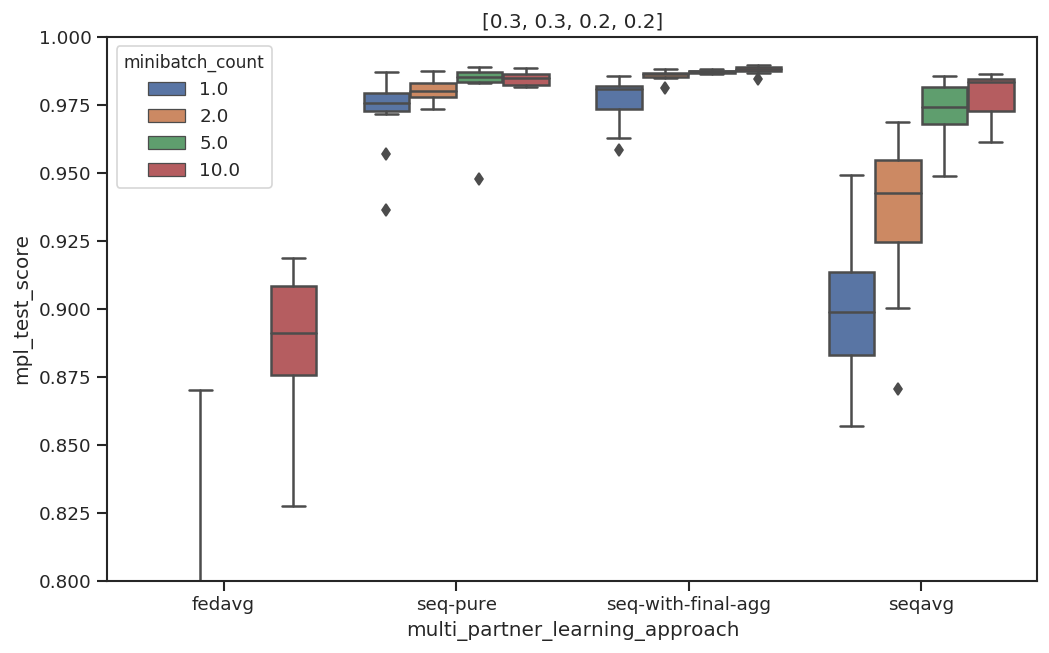

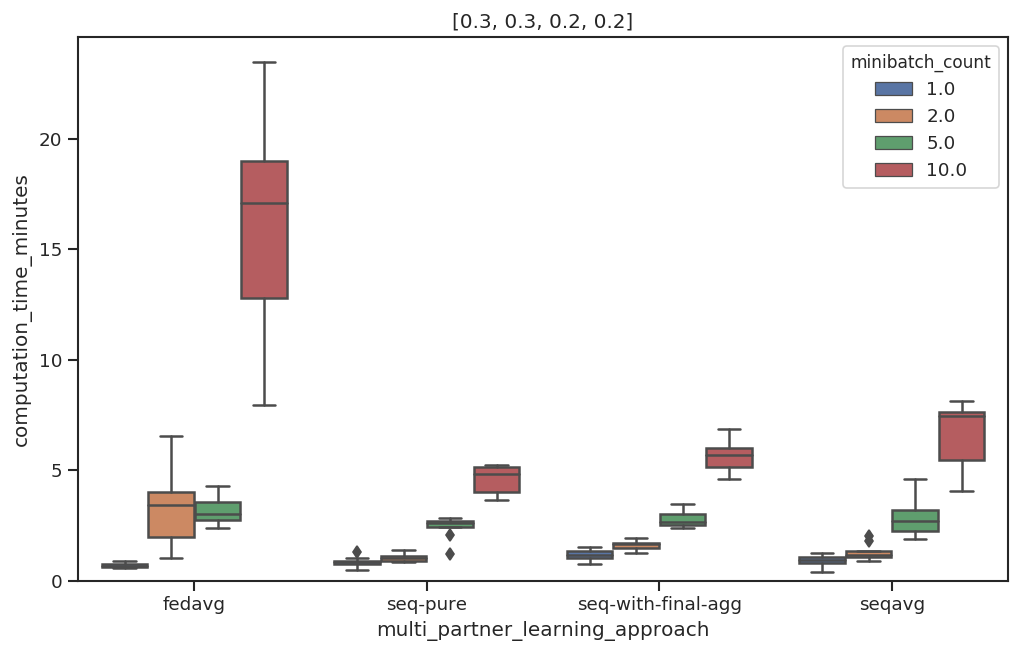

In [122]:
# Plot loop
for amounts_per_partner in amounts_per_partner_list:
    
    current_df = df[df.amounts_per_partner == amounts_per_partner]

    sns.set(style="ticks")
    #current_df.info()
    print("################################################")
    print(amounts_per_partner)

    plt.figure(figsize=(10, 6), dpi=120)
    plt.title(amounts_per_partner)
    ax = sns.boxplot(x="multi_partner_learning_approach", y="mpl_test_score", hue="minibatch_count",
                       data=current_df)
    plt.ylim([0.8, 1])

        
    ax = plt.figure(figsize=(10, 6), dpi=120)
    plt.title(amounts_per_partner)
    sns.boxplot(x="multi_partner_learning_approach", y="computation_time_minutes", hue="minibatch_count",
                     data=current_df)
    plt.ylim(bottom=0)

    
    plt.show()
    